# Assignment 1
## Author: Serhii Korzh (802172)

### Imports

In [1]:
import altair as alt
from altair import expr, datum
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Exercise 1

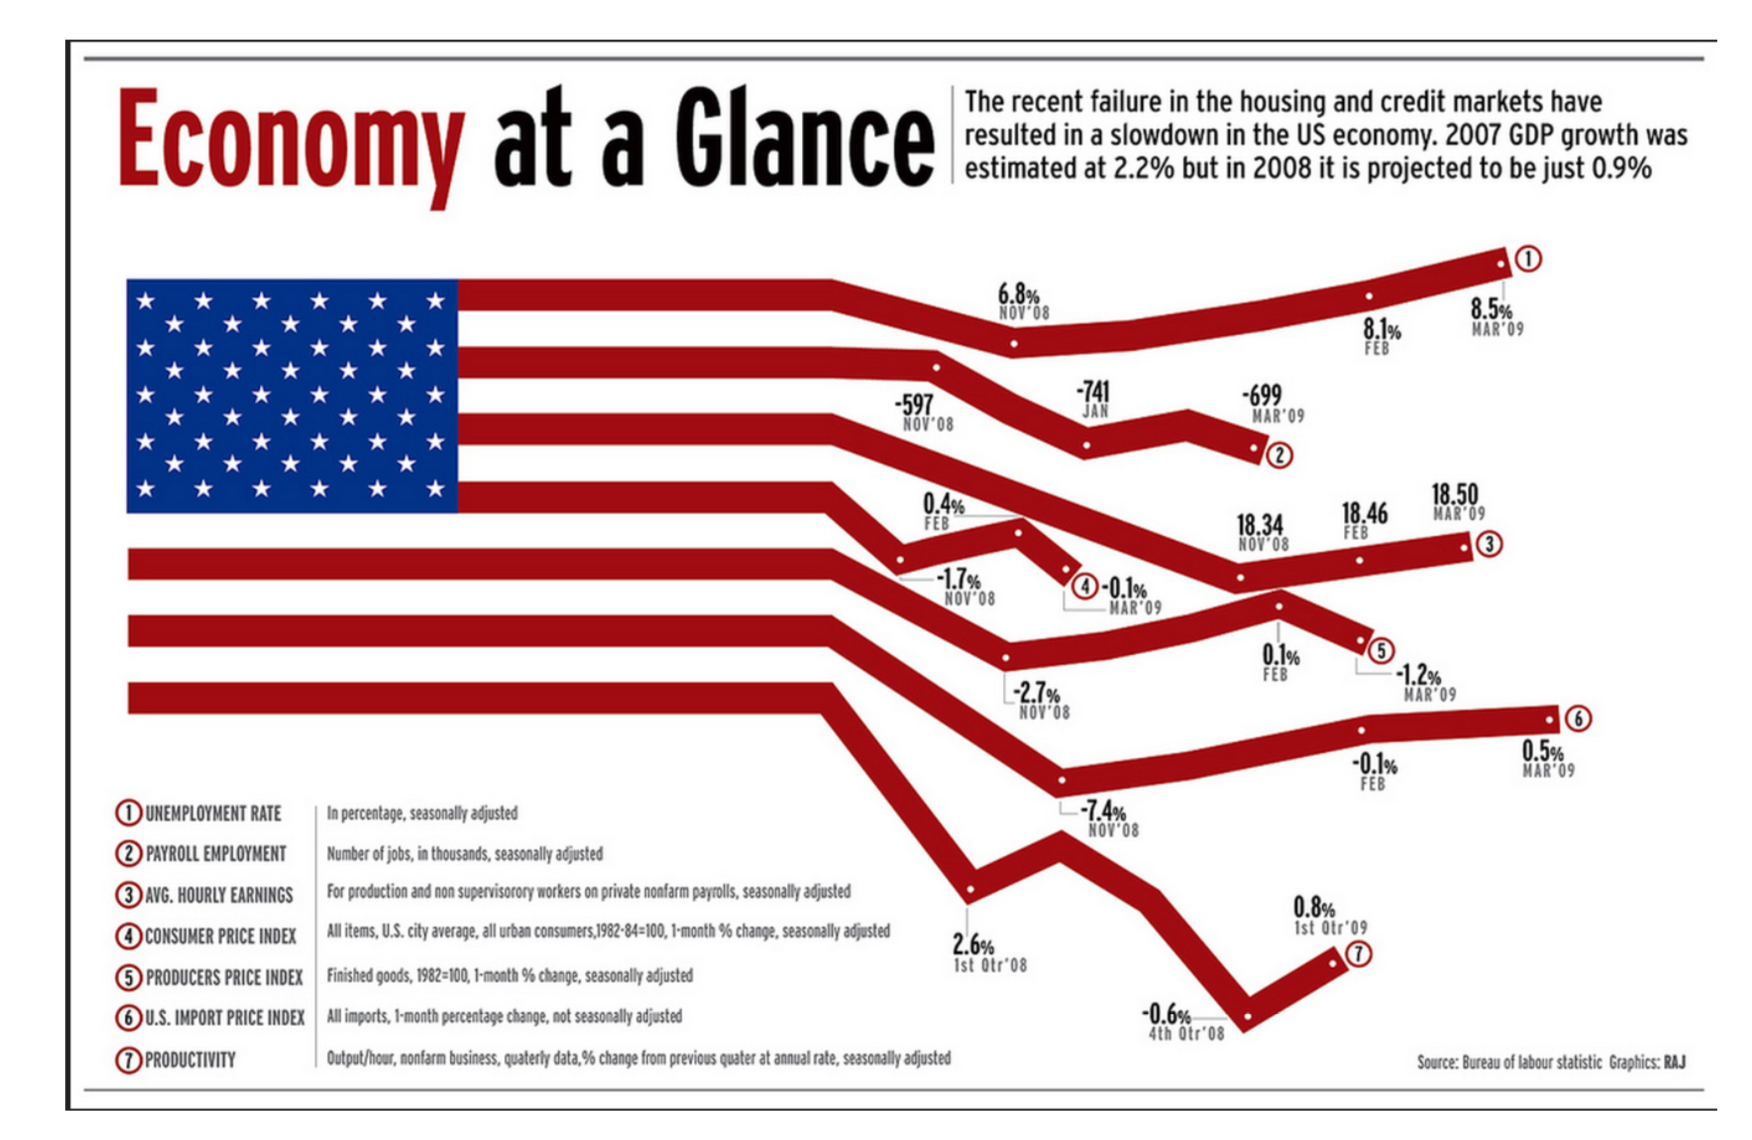

**(a)** *Analyse the visualisation in Figure 1, starting from Tufte’s principles. List at least 4 items that contradict these good design principles.*

1. **Chartjunk.** The whole left part of the graph is filled with the flag of the USA. While it is definitely a catchy design, the flag does not serve any purpose rather than indicating that this is data concerning the USA.
2. **Design variation mixed with data variation.** The graphic shows many different variables on one plot, yet, the scales and units of both the Y and X axes are different for different variables.
3. **Unclear and ambigous labelling of data.** Labels are placed too far from the actual data, and, given the number of the shown metrics, it is hard to see which graph depicts which metric. Additionally, the graph points are labelled inconsistently, with some "bumps" in the data not labelled at all (e.g. in metrics #2 and #7). Since there are no axes, it is very hard to infer the actual values. Moreover, there is no information on the initial values and dates of the metrics.
4. **Suboptimal use of data-ink.** Due to chartjunk and other design decisions (e.g. uninformative label indices instead of actual labels), the data-ink ratio is low. Furthermore, there is a lot of unnecesary data ink (like the thick graph lines).

**(b)** Give a suggestion for a better visualisation for the same task, using the data shown in Figure 1, and explain your design choices. For a full mark you should provide an image (e.g. drawing, even by hand) and an argumentation, why the proposal is better than the original.

I propose the following visualisation:

In [2]:
unemp = pd.DataFrame({
    'val': [.068, .081, .085],
    'date': ['2008-11-01', '2009-02-01', '2009-03-01'],
})

payroll = pd.DataFrame({
    
})

avg_hour = pd.DataFrame({
    
})

indices = pd.DataFrame({
    'val': [-0.017, 0.004, -0.001,  -0.027, 0.001, -0.012,  -0.074, -0.001, 0.005],
    'date': ['2008-11-01', '2009-02-01', '2009-03-01', '2008-11-01', '2009-02-01', '2009-03-01', '2008-11-01', '2009-02-01', '2009-03-01'],
    'index': ['Consumer Price Index (season. adj.)', 'Consumer Price Index (season. adj.)', 'Consumer Price Index (season. adj.)', 'Producers Price Index (season. adj.)', 'Producers Price Index (season. adj.)', 'Producers Price Index (season. adj.)', 'U.S. Import Price Index (not season. adj.)', 'U.S. Import Price Index (not season. adj.)', 'U.S. Import Price Index (not season. adj.)']
})

prod = pd.DataFrame({
    'val': [0.026, -0.006, 0.008],
    'date': ['2008-01-01', '2008-10-01', '2009-01-01']
})

In [3]:
ch = alt.Chart(unemp).mark_line(point=True).encode(
    alt.X('yearmonth(date)', scale=alt.Scale(zero=False), title=None, axis=alt.Axis(format='%b \\\'%y', domain=True, grid=False)),
    alt.Y('val:Q', title=None, axis=alt.Axis(format='%', grid=False, domain=False)),
).properties(
    title='Unemployment rate in the USA, seasonally adjusted',
    width=300,
    height=240
)


text = ch.mark_text(
    align='center',
    baseline='bottom',
    dy=17,
    dx=12
).encode(
    text=alt.Text('val:Q', format='.1%')
)

(ch + text).configure_view(
    stroke=None
).save('img/ex1-unemp.svg', webdriver='firefox')

In [4]:
alt.Chart(indices).mark_line(point=True).encode(
    x=alt.X('yearmonth(date)', title=None, axis=alt.Axis(format='%b \\\'%y', domain=True, grid=False)),
    y=alt.Y('val:Q', title=None, axis=alt.Axis(format='%', grid=True, domain=False)),
    color=alt.Color('index', title=None, legend=alt.Legend(labelLimit=200)),
).configure_view(
    stroke=None
).properties(
    title='Indices of economic growth, U.S. data',
    width=320,
    height=320
).save('img/ex1-ind.svg', webdriver='firefox')

In [5]:
ch = alt.Chart(prod).mark_line(point=True).encode(
    alt.X('yearquarter(date):T', scale=alt.Scale(zero=False), title=None, axis=alt.Axis(format='Q%q \\\'%y', domain=True, grid=False)),
    alt.Y('val:Q', title=None, axis=alt.Axis(format='%', grid=False, domain=False)),
).properties(
    title='Productivity of the USA, output/hour, nonfarm business (season. adj.)',
    width=250,
    height=200
)

text = ch.mark_text(
    align='center',
    baseline='bottom',
    dy=16,
    dx=1
).encode(
    text=alt.Text('val:Q', format='.1%')
)

(ch + text).configure_view(
    stroke=None
).save('img/ex1-prod.svg', webdriver='firefox')

## Exercise 2

I chose the following graphic from
https://www.livescience.com/coronavirus-updates-united-states.html
<img src="ex2.jpg" alt="figure" width="600"/>


Live Science is a US-based commercial science news service. The visualisation is from a recent article regarding the SARS-CoV-2 outbreak in the US. I personally believe the visualisation is poorly designed because of the following:
1. **The graphic is ambiguous.** There is no information regarding what those colours actually mean. I assume it is showing where there was at least 1 confirmed case of SARS-CoV-2 as of March 11. However, it is not mentioned anywhere (including the supporting article).
2. **The map presents little actual information.** Given the assumption I made in the previous point, the whole graphic is basically saying: almost all of the states have at least 1 infected person. It gives no information about the distribution of cases or deaths, so the whole visualisation can be replaced with the previous statement, the number of cases, and the number of deaths.

## Exercise 3

In [6]:
df = pd.read_csv('data/climate.data', header=0, names=['Month', 'Year', 'Globe', 'Land', 'Ocean'])
df['Day'] = 1
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
new_df = pd.melt(df, id_vars=['Date', 'Year'], value_vars=['Land', 'Ocean', 'Globe'], var_name='Loc', value_name='Temp')

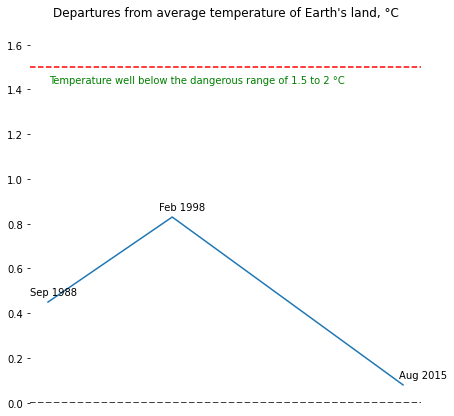

In [9]:
betw = lambda x, y: df[df['Year'].between(x,y)]
lloc = 'Land'
graph_idxs = [betw(1974, 1990)[lloc].idxmax(), betw(1995, 2000)[lloc].idxmax(), + betw(2015, 2020)[lloc].idxmin()]

f, ax = plt.subplots(figsize=(7, 7))
data = df.loc[graph_idxs]
y_min, y_max = (0, 1.7)
x_min, x_max = (data['Date'].min().timestamp(), data['Date'].max().timestamp())
ax = sns.lineplot(x='Date', y='Land', data=data)
ax.set_ylim(y_min, y_max)


x_coord = lambda x: (x[1]['Date'].timestamp() - x_min) / (x_max - x_min + 50000000)
y_coord = lambda x: (x[1]['Land'] - y_min) /(y_max - y_min)
annot = lambda x: ax.annotate(
    x[1]['Date'].month_name()[:3] + " " + str(x[1]['Year']), 
    xy=(x_coord(x), y_coord(x)), 
    xycoords="axes fraction",
    xytext=(0,15), textcoords="offset points",
    ha="left", va="top"
)
[annot(x) for x in df.loc[graph_idxs].iterrows()]
sns.despine(bottom = True, left = True)
ax.axhline(1.5, ls='--', color='red')
ax.text(s='Temperature well below the dangerous range of 1.5 to 2 °C', y=1.43, x=726000, color='green')
ax.axhline(-0.003, ls='--', color='black')

ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Departures from average temperature of Earth\'s land, °C')
plt.savefig('img/ex3-a.png')
plt.show()

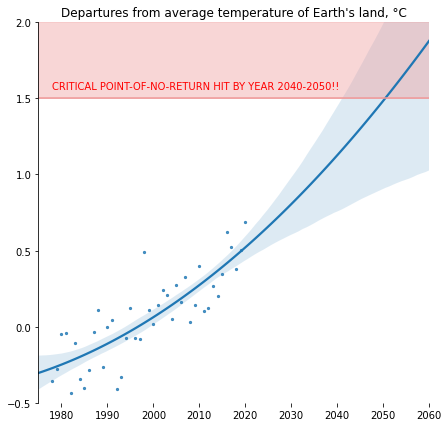

In [11]:
# plt.xlim(1972, 2050)
f, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(1975, 2060)
ax.set_ylim(-0.5,2)
lloc = 'Land'
data = df['Land'].groupby(df['Year']).mean()
sns.despine(bottom = True, left = False, right=True)

ax = sns.regplot(x=data.index, y=data, ax=ax, scatter_kws={"s": 5}, order=2, ci=80, truncate=False)
ax.axhline(1.5, ls='-', color='#EF9A9A')
ax.axhspan(2, 1.5, color='#EF9A9A', alpha=0.4)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Departures from average temperature of Earth\'s land, °C')
ax.text(s='CRITICAL POINT-OF-NO-RETURN HIT BY YEAR 2040-2050!!', y=1.56, x=1978, color='red')
plt.savefig('img/ex3-b.png')
plt.show()

In [14]:
real_data = new_df.groupby(['Year', 'Loc']).mean().reset_index()
ch = alt.Chart(real_data).mark_bar().encode(
    x=alt.X('Year:O', title=None, axis=alt.Axis(domain=False)),
    y=alt.Y('Temp:Q', title='°C', axis=alt.Axis(domain=False, zindex=1, gridColor='white')),
    facet=alt.Facet('Loc', columns=3, title=None),
    color=alt.condition(
        alt.datum.Temp > 0,
        alt.value("darkred"),
        alt.value("darkgreen"),
    )
).configure_view(
    stroke=None
).properties(
    title='Departures from yearly average temperature of Earth in different locations',
    
    width=350,
    height=350
)

ch.save('img/ex3-d.svg', webdriver='firefox')
ch

alt.Chart(...)

## Exercise 4

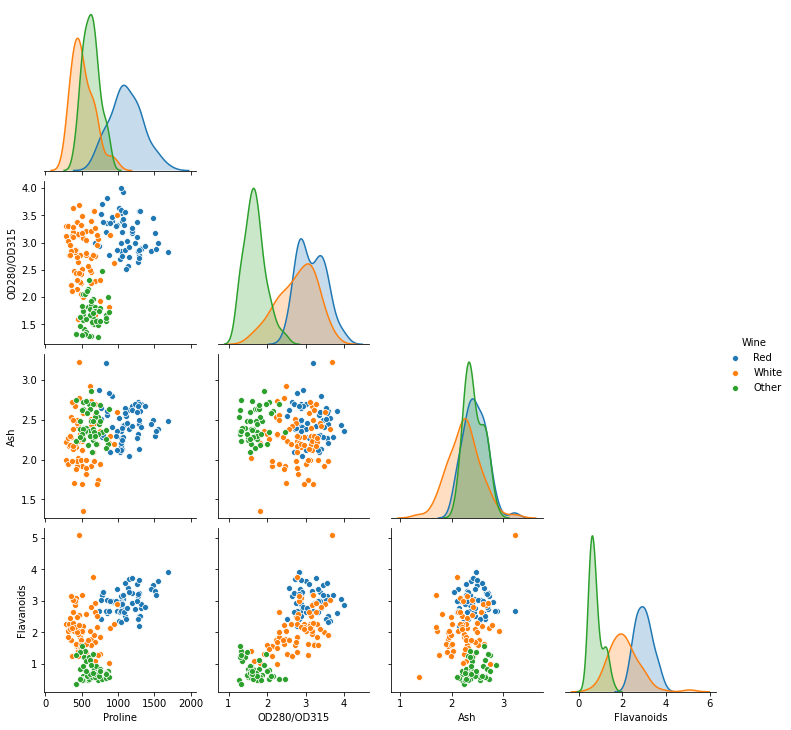

In [13]:
wine_attrs_text = """1. Alcohol
2. Malic acid
3. Ash
4. ash Alcalinity
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315
13. Proline"""

wine_attrs = ['Wine'] + list(map(lambda x: x.split('.')[1].strip(), wine_attrs_text.split('\n')))

wine_data = pd.read_csv('data/wine.data', names=wine_attrs).replace(
    {'Wine': {1: 'Red', 2: 'White', 3: 'Other'}}
)

wine_subset = wine_data[
    ["Wine","Proline","OD280/OD315","Ash","Flavanoids"]
]
ax = sns.pairplot(wine_subset, hue="Wine", corner=True)
ax.savefig('img/ex4.png')